<a href="https://colab.research.google.com/github/Jinqiao-Li/SwissText2025_CleanTech/blob/main/phase1/patent_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleantech Media Dataset:**

cleantech_media_dataset_v3_2024-10-28.csv
cleantech_rag_evaluation_data_2024-09-20.csv

https://www.kaggle.com/datasets/jannalipenkova/cleantech-media-dataset

**Cleantech Google Patent Dataset:**

CleanTech_22-24_updated.json

https://www.kaggle.com/datasets/prakharbhandari20/cleantech-google-patent-dataset?resource=download.

In [1]:
import kagglehub
import pandas as pd
import json
import matplotlib.pyplot as plt

# Media dataset

In [2]:
# Download latest version
media_path = kagglehub.dataset_download("jannalipenkova/cleantech-media-dataset")
df = pd.read_csv(media_path + "/cleantech_media_dataset_v3_2024-10-28.csv")

df.head()

100%|██████████| 31.9M/31.9M [00:00<00:00, 196MB/s]

Extracting files...


,Unnamed: 0,title,date,author,content,domain,url
0,93320,"XPeng Delivered ~100,000 Vehicles In 2021",2022-01-02,NaN,['Chinese automotive startup XPeng has shown o...,cleantechnica,https://cleantechnica.com/2022/01/02/xpeng-del...
1,93321,Green Hydrogen: Drop In Bucket Or Big Splash?,2022-01-02,NaN,['Sinopec has laid plans to build the largest ...,cleantechnica,https://cleantechnica.com/2022/01/02/its-a-gre...
2,98159,World’ s largest floating PV plant goes online...,2022-01-03,NaN,['Huaneng Power International has switched on ...,pv-magazine,https://www.pv-magazine.com/2022/01/03/worlds-...
3,98158,Iran wants to deploy 10 GW of renewables over ...,2022-01-03,NaN,"['According to the Iranian authorities, there ...",pv-magazine,https://www.pv-magazine.com/2022/01/03/iran-wa...
4,31128,Eastern Interconnection Power Grid Said ‘ Bein...,2022-01-03,NaN,['Sign in to get the best natural gas news and...,naturalgasintel,https://www.naturalgasintel.com/eastern-interc...


## Domain

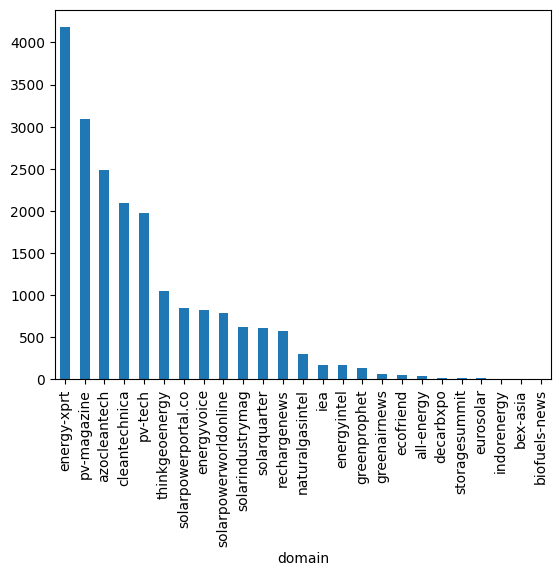

In [ ]:
df.domain.value_counts().plot(kind="bar")
plt.show()

## date

In [ ]:
pd.to_datetime(df['date'])

,date
0,2022-01-02
1,2022-01-02
2,2022-01-03
3,2022-01-03
4,2022-01-03
...,...
20106,2024-10-24
20107,2024-10-24
20108,2024-10-24
20109,2024-10-24


In [ ]:
date_counts = df.groupby('date')['date'].count().reset_index(name='count')
date_counts

,date,count
0,2022-01-02,2
1,2022-01-03,12
2,2022-01-04,13
3,2022-01-05,20
4,2022-01-06,18
...,...,...
974,2024-10-18,17
975,2024-10-21,12
976,2024-10-22,11
977,2024-10-23,15


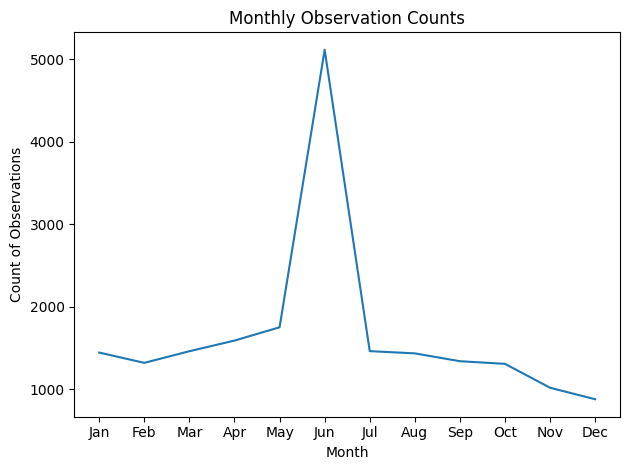

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# 2. Extract the month from the 'date' column
df['month'] = df['date'].dt.month # Or df['date'].dt.to_period('M') for period objects

# 3. Group by month and count observations
monthly_counts = df.groupby('month')['month'].count().reset_index(name='count')

# 4. Plot the data
plt.plot(monthly_counts['month'], monthly_counts['count'])
plt.xlabel("Month")
plt.ylabel("Count of Observations")
plt.title("Monthly Observation Counts")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Set x-axis labels to month names
plt.tight_layout()
plt.show()

In [ ]:
df

,Unnamed: 0,title,date,author,content,domain,url,month
0,93320,"XPeng Delivered ~100,000 Vehicles In 2021",2022-01-02,NaN,['Chinese automotive startup XPeng has shown o...,cleantechnica,https://cleantechnica.com/2022/01/02/xpeng-del...,1
1,93321,Green Hydrogen: Drop In Bucket Or Big Splash?,2022-01-02,NaN,['Sinopec has laid plans to build the largest ...,cleantechnica,https://cleantechnica.com/2022/01/02/its-a-gre...,1
13,65564,Community solar policy gets green light in man...,2022-01-03,NaN,['Community solar is a unique market segment t...,solarpowerworldonline,https://www.solarpowerworldonline.com/2022/01/...,1
12,93322,Green Jobs & The Global Skills Gap,2022-01-03,NaN,['The green economy affects the growth of huma...,cleantechnica,https://cleantechnica.com/2022/01/03/green-job...,1
11,93323,Researchers Pioneer New View of Deep Rock Frac...,2022-01-03,NaN,['The flow of electrical current signals chang...,cleantechnica,https://cleantechnica.com/2022/01/03/researche...,1
...,...,...,...,...,...,...,...,...
20100,101430,Mobile PV-powered EV charging stations for com...,2024-10-24,NaN,['United Kingdom-based 3ti Energy Hubs has lau...,pv-magazine,https://www.pv-magazine.com/2024/10/24/__trash...,10
20099,101429,Longi Green Energy sets world record for solar...,2024-10-24,NaN,['China’ s Longi Green Energy has set a new wo...,pv-magazine,https://www.pv-magazine.com/2024/10/24/longi-g...,10
20109,101428,Residential PV prices in Germany drop 25% with...,2024-10-24,NaN,"['The comparison site Selfmade Energy shows, i...",pv-magazine,https://www.pv-magazine.com/2024/10/24/residen...,10
20103,104260,Trina Solar reaches 25.9% i-TOPCon solar cell ...,2024-10-24,NaN,['Chinese module manufacturer Trina Solar has ...,pv-tech,https://www.pv-tech.org/trina-solar-i-topcon-s...,10


In [ ]:
df['date'].dt

,month,count
0,1,1444
1,2,1319
2,3,1460
3,4,1589
4,5,1750
5,6,5113
6,7,1461
7,8,1434
8,9,1339
9,10,1307
